In [1]:
using CairoMakie, Statistics

In [2]:
include("io_array.jl")

read_from_csv (generic function with 1 method)

In [3]:
function load_average(filename, num_seeds)
    avg = nothing
    for seed in 1:num_seeds
        data = read_from_file(filename * "_seed=$(seed).txt")
        if avg === nothing
            avg = copy(data)
        else
            avg .+= data
        end
    end

    avg ./= num_seeds

    return avg
end

load_average (generic function with 1 method)

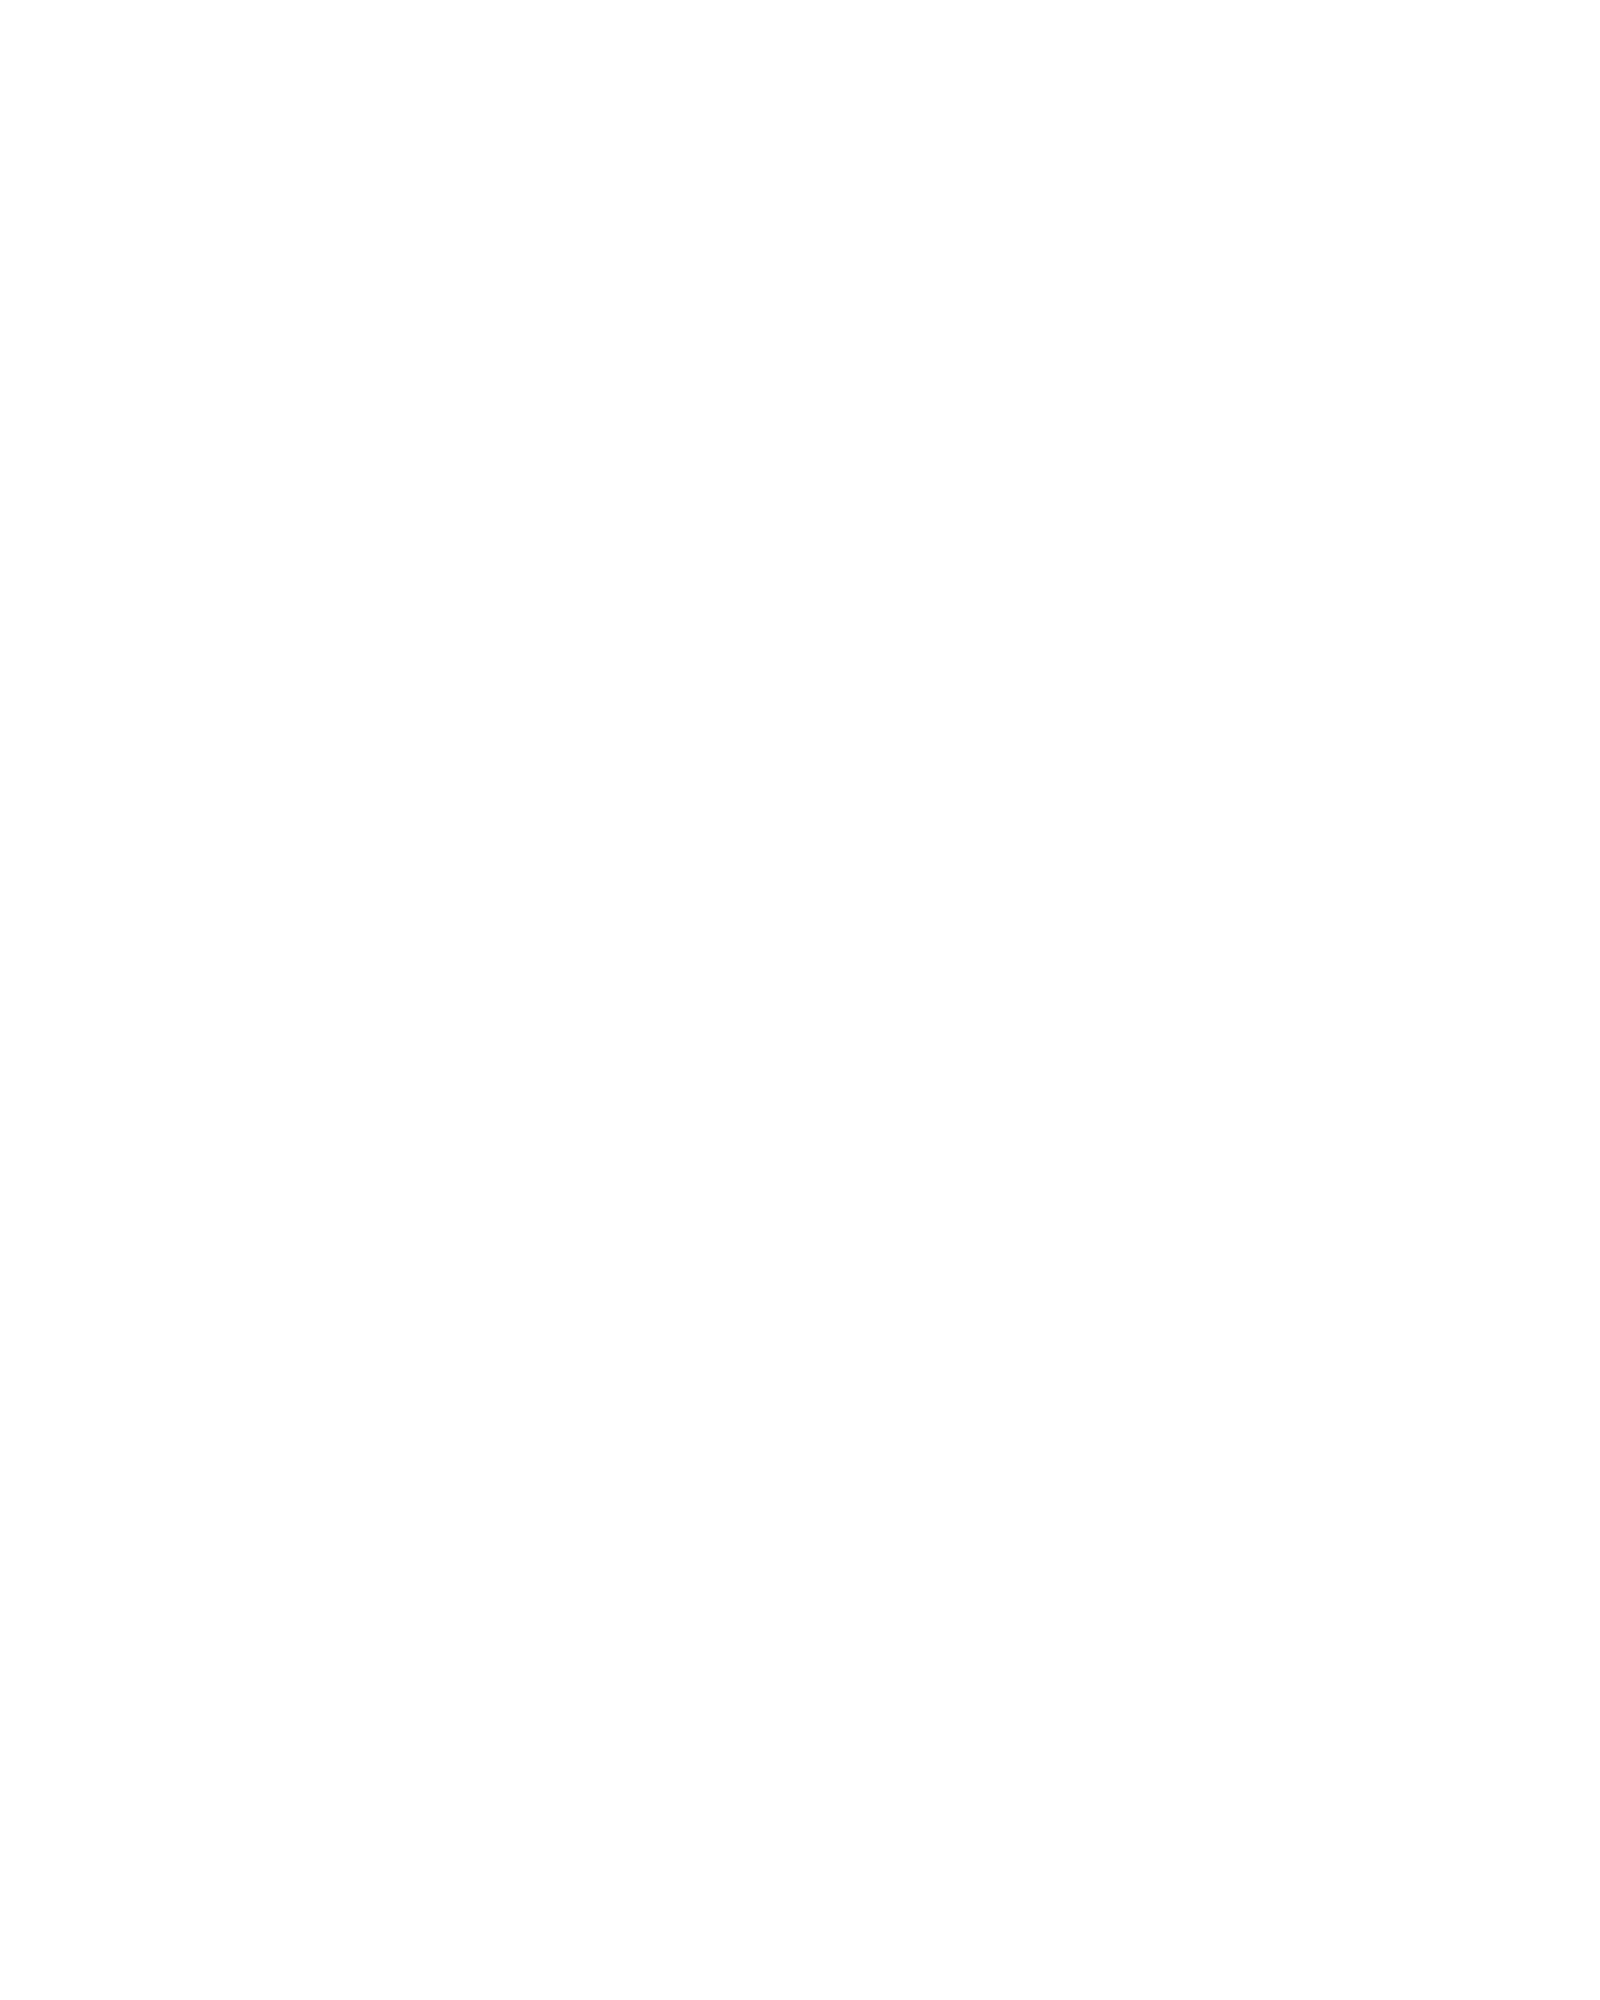

In [4]:
set_theme!(
    fontsize=25,
    Legend=(labelsize=20,),
    Axis=(
        xgridvisible=false,
        ygridvisible=false,
    ),
)

fig = Figure(size=(800, 1000))

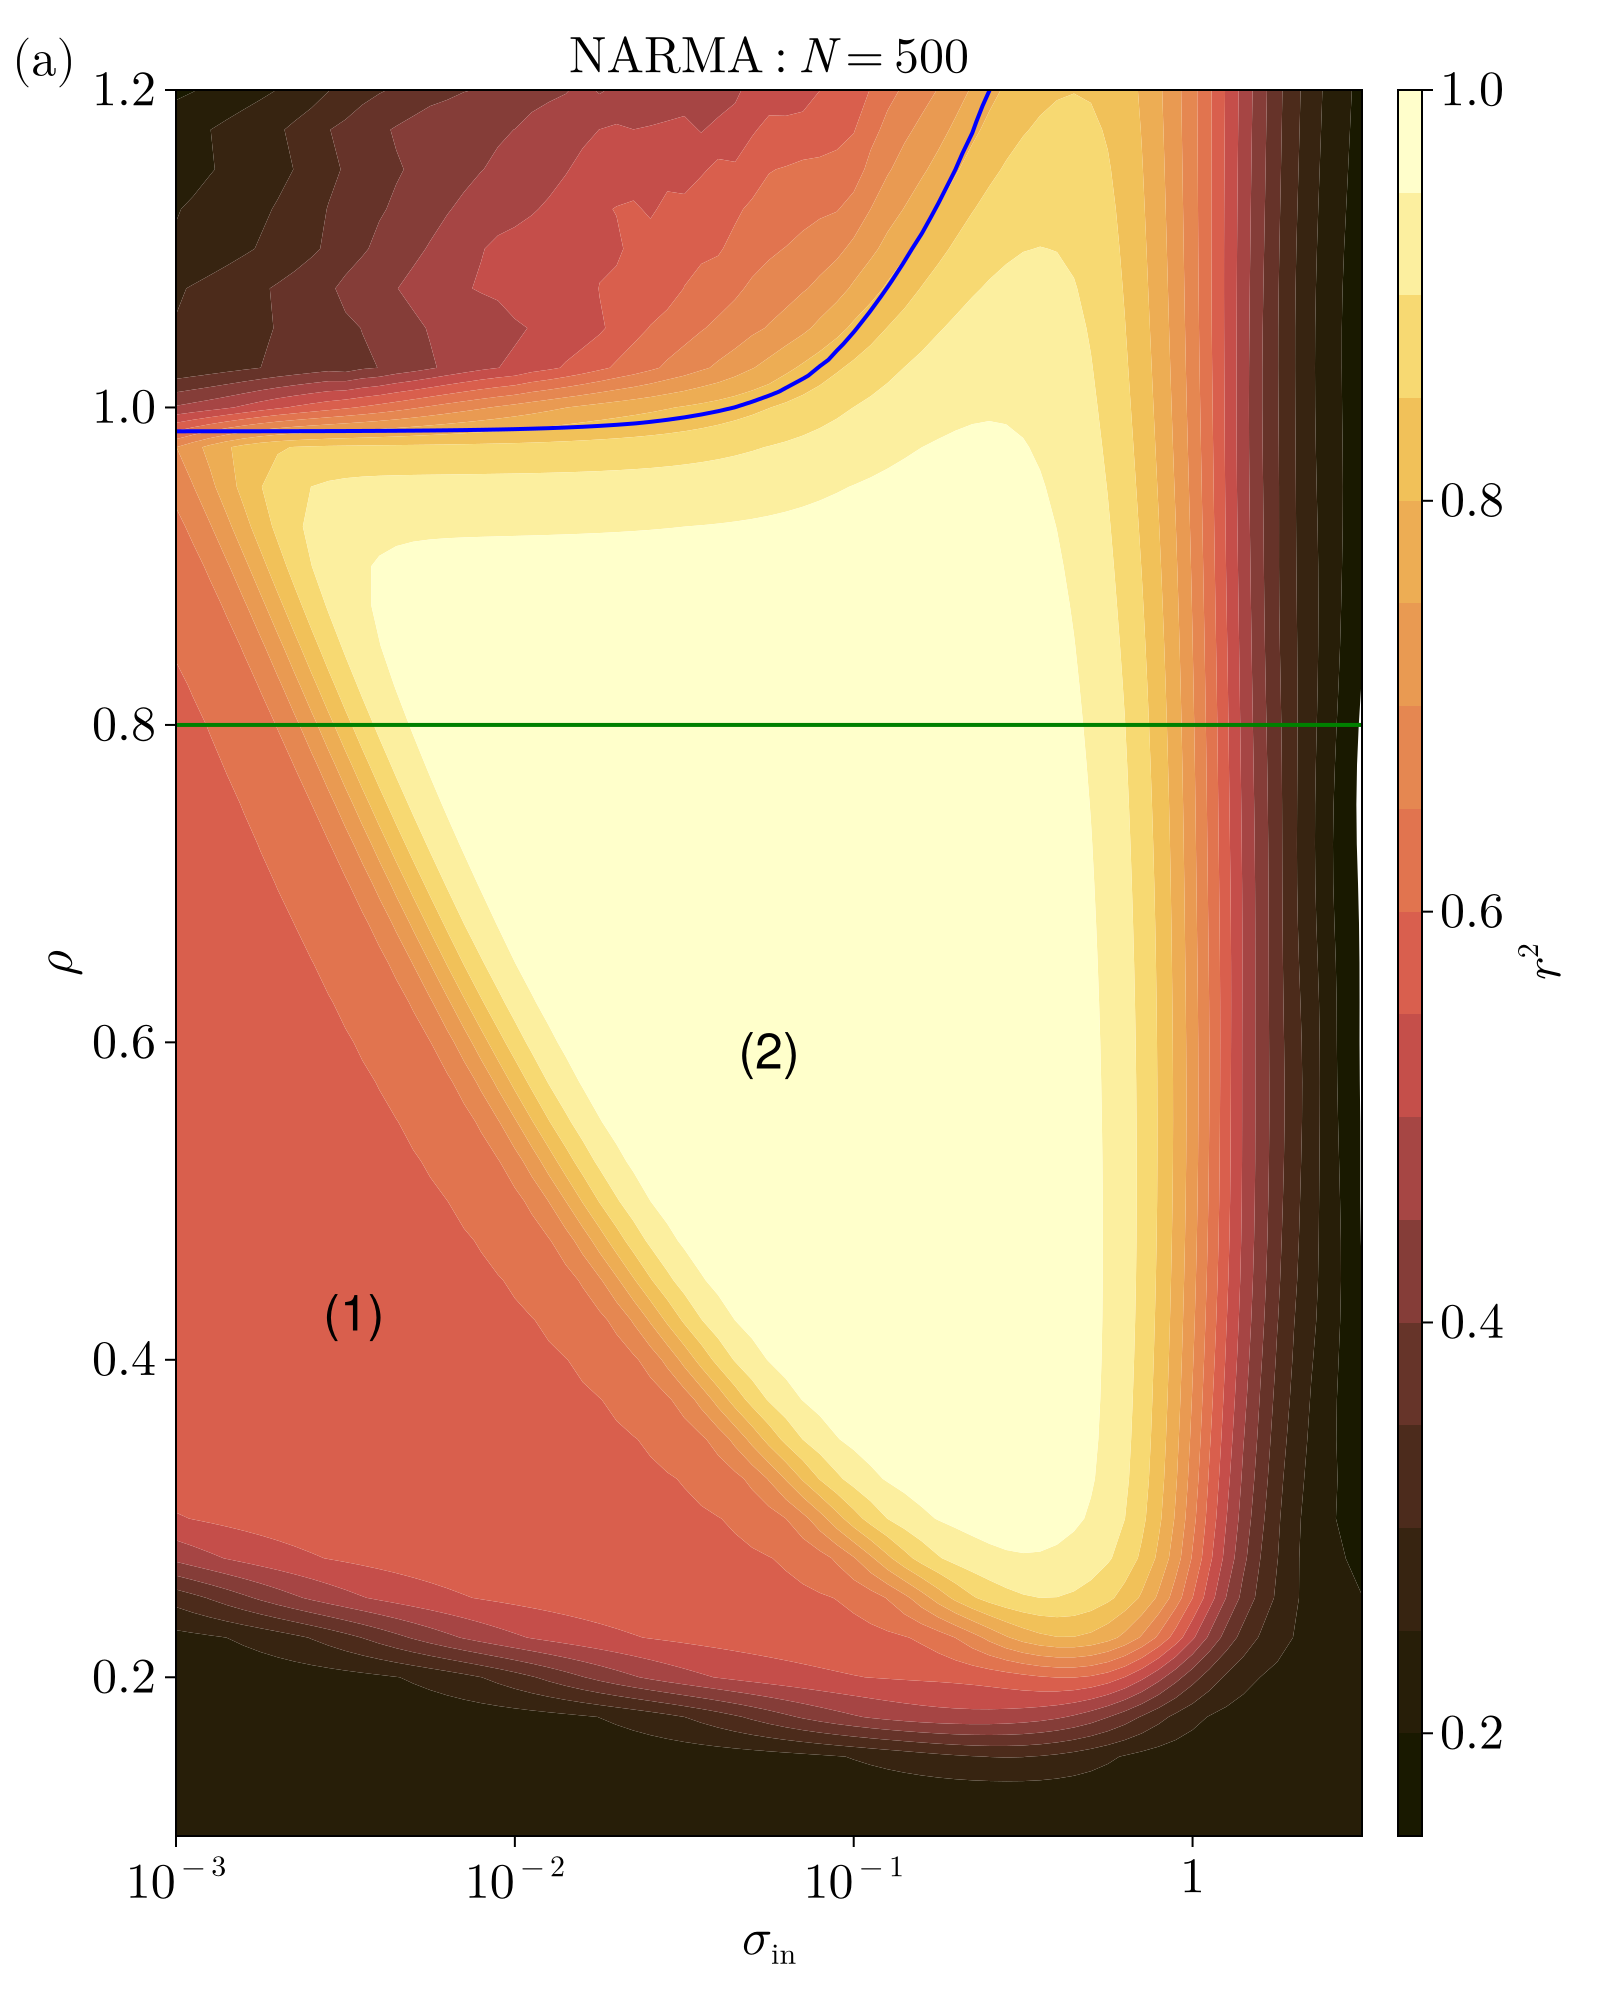

In [5]:
# --- NARMA N=500: heatmap ---

filename = "data//narma_r2_map//r2_map_N=500"
avg_r2 = load_average(filename, 30)

input_std_grid = 10.0 .^ (-3:0.05:0.5)
spectral_radius_grid = 0.1:0.025:1.3

filename = "data//lyapunov_map//lyapunov_map_N=500"
avg_lyap = load_average(filename, 10)

spectral_radius_grid_lyap = read_from_file("data//lyapunov_map//1_spectral_radius_grid.txt")[:, 1]
input_std_grid_lyap = read_from_file("data//lyapunov_map//2_input_std_grid.txt")[:, 1]

ax = Axis(fig[1, 1][1, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"\rho",
    xscale=log10,
    xticks=([1e-3, 1e-2, 1e-1, 1], [L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1"]),
    yticks=(0.2:0.2:1.2, [L"0.2", L"0.4", L"0.6", L"0.8", L"1.0", L"1.2"]),
    title=L"\mathrm{NARMA:} N = 500")

xlims!(ax, minimum(input_std_grid), maximum(input_std_grid))
ylims!(ax, minimum(spectral_radius_grid), 1.2)

hm = contourf!(ax, input_std_grid, spectral_radius_grid, avg_r2';
    colormap=:lajolla, levels = 0.15:0.05:1)

contour!(ax, input_std_grid_lyap, spectral_radius_grid_lyap, avg_lyap' .+ 1.0, 
    levels=[0.97], color=:blue, linewidth=2)

hlines!(ax, 0.8; color=:green, linewidth=2)

Colorbar(fig[1, 1][1, 2], hm;
    ticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    label=L"r^2")

text!(ax, 0.15, 0.3,
    text      = "(1)",
    space     = :relative,
    align     = (:center, :center),
    fontsize  = 25,
    color     = :black)

text!(ax, 0.5, 0.45,
    text      = "(2)",
    space     = :relative,
    align     = (:center, :center),
    fontsize  = 25,
    color     = :black)
    
Label(fig[1, 1, TopLeft()], L"\mathrm{(a)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

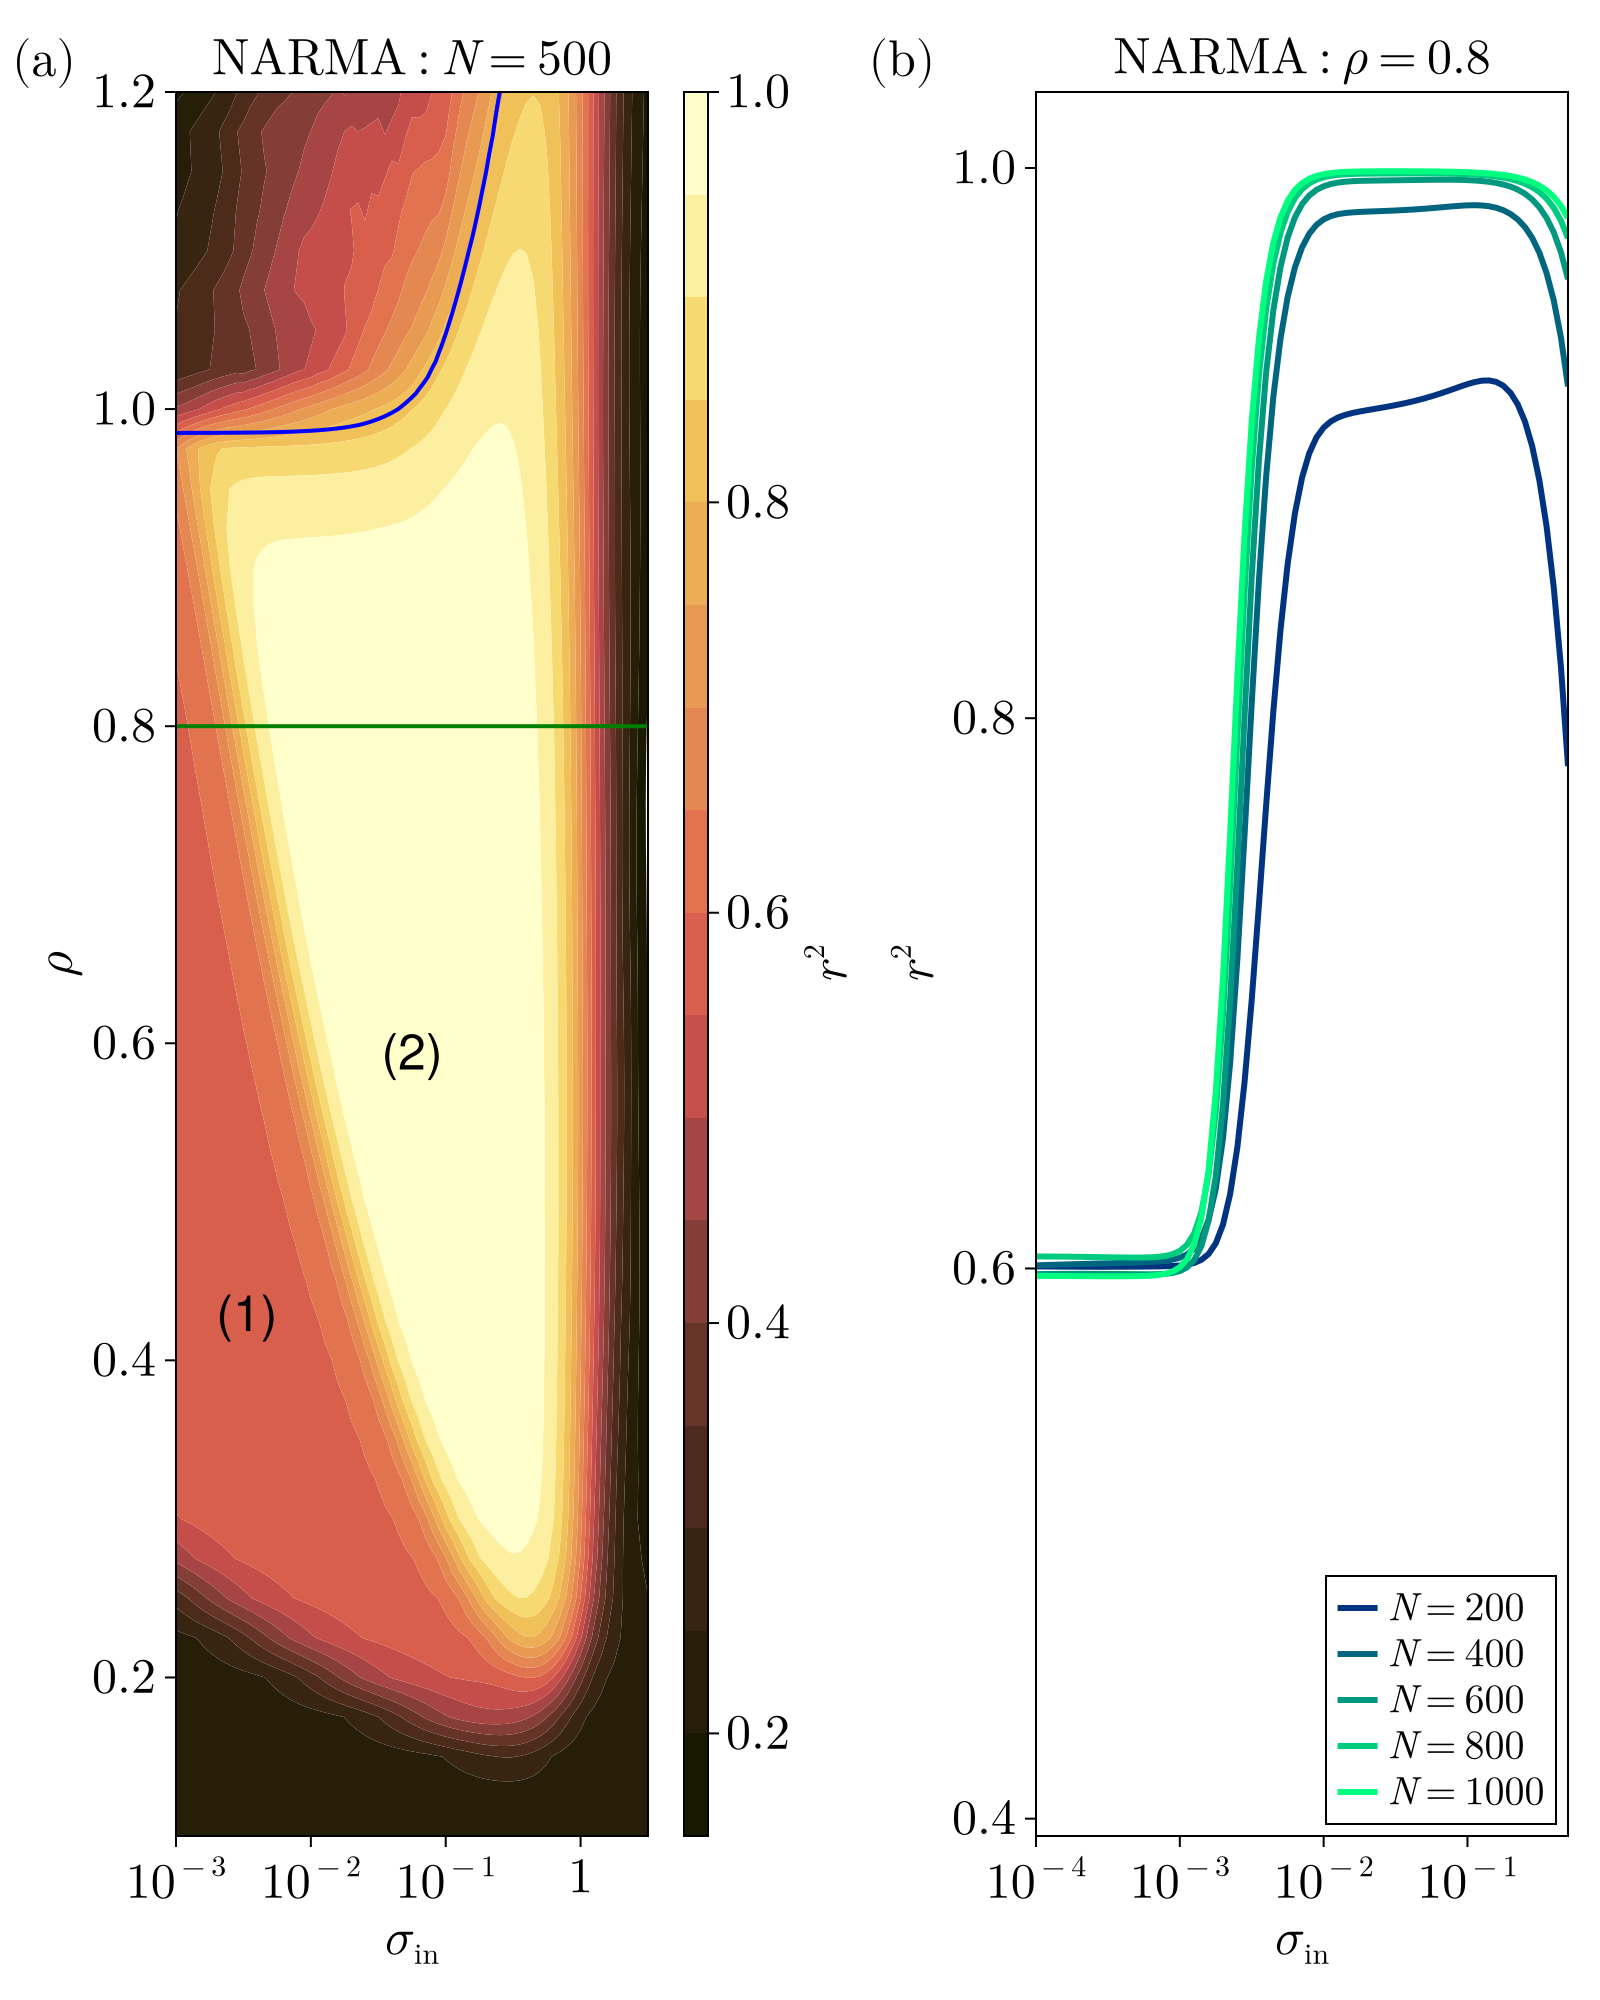

In [6]:
# --- NARMA: r2 for rho=0.8 ---

input_std_grid = read_from_file("data//narma_r2//1_input_std_grid.txt")[:, 1]

avg_r2_200 = load_average("data//narma_r2//r2_N=200", 50)[:, 1]
avg_r2_400 = load_average("data//narma_r2//r2_N=400", 50)[:, 1]
avg_r2_600 = load_average("data//narma_r2//r2_N=600", 20)[:, 1]
avg_r2_800 = load_average("data//narma_r2//r2_N=800", 20)[:, 1]
avg_r2_1000 = load_average("data//narma_r2//r2_N=1000", 20)[:, 1]

ax = Axis(fig[1, 2];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-4, 1e-3, 1e-2, 1e-1, 1], [L"10^{-4}", L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"\mathrm{NARMA:} \rho = 0.8")

xlims!(ax, 1e-4, 0.5)

lines!(ax, input_std_grid, avg_r2_200, linewidth=3, color=RGBf(0, 0.2, 0.5), label=L"N = 200")
lines!(ax, input_std_grid, avg_r2_400, linewidth=3, color=RGBf(0, 0.4, 0.5), label=L"N = 400")
lines!(ax, input_std_grid, avg_r2_600, linewidth=3, color=RGBf(0, 0.6, 0.5), label=L"N = 600")
lines!(ax, input_std_grid, avg_r2_800, linewidth=3, color=RGBf(0, 0.8, 0.5), label=L"N = 800")
lines!(ax, input_std_grid, avg_r2_1000, linewidth=3, color=RGBf(0, 1, 0.5), label=L"N = 1000")

axislegend(ax; position=:rb)

Label(fig[1, 2, TopLeft()], L"\mathrm{(b)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

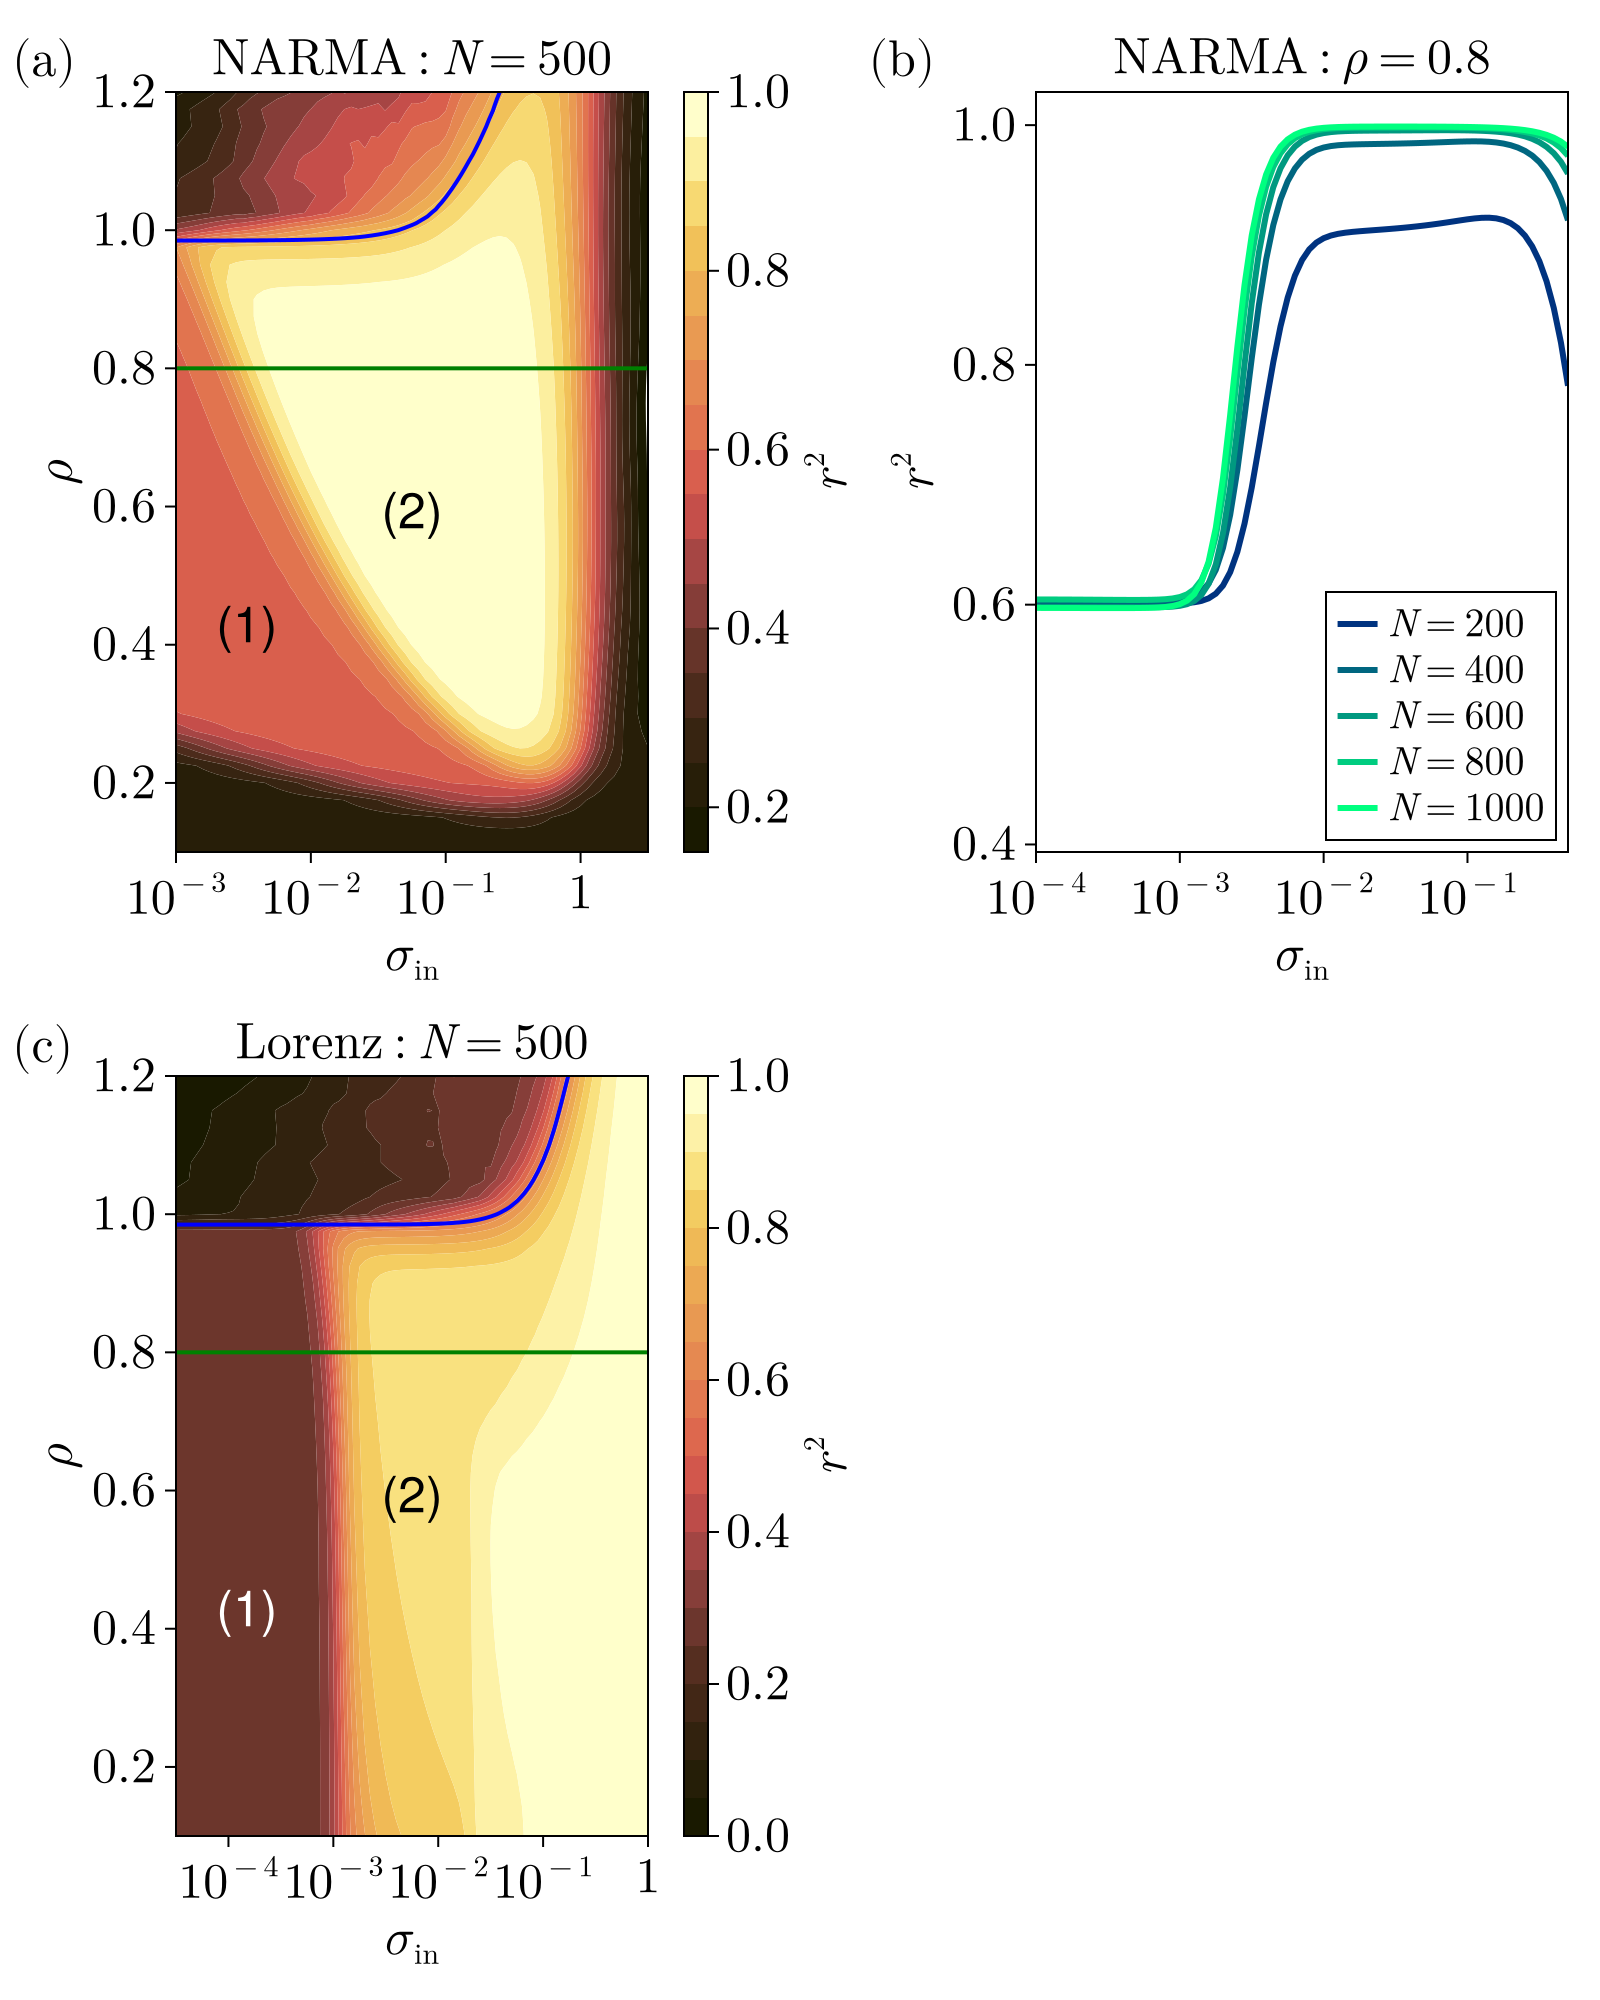

In [7]:
# --- Lorenz N=500: heatmap ---

filename = "data//lorenz_r2_map//r2_map_N=500"
avg_r2 = load_average(filename, 20)

spectral_radius_grid = read_from_file("data//lorenz_r2_map//1_spectral_radius_grid.txt")[:, 1]
input_std_grid = read_from_file("data//lorenz_r2_map//2_input_std_grid.txt")[:, 1]

filename = "data//lorenz_lyapunov//lyapunov_map_lorenz_N=500"
avg_lyap = load_average(filename, 10)

spectral_radius_grid_lyap = read_from_file("data//lorenz_lyapunov//1_spectral_radius_grid.txt")[:, 1]
input_std_grid_lyap = read_from_file("data//lorenz_lyapunov//2_input_std_grid.txt")[:, 1]

ax = Axis(fig[2, 1][1, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"\rho",
    xscale=log10,
    xticks=([1e-4, 1e-3, 1e-2, 1e-1, 1], [L"10^{-4}", L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1"]),
    yticks=(0.2:0.2:1.2, [L"0.2", L"0.4", L"0.6", L"0.8", L"1.0", L"1.2"]),
    title=L"\mathrm{Lorenz:} N = 500")

xlims!(ax, minimum(input_std_grid), maximum(input_std_grid))
ylims!(ax, minimum(spectral_radius_grid), 1.2)

hm = contourf!(ax, input_std_grid, spectral_radius_grid, avg_r2';
    colormap=:lajolla, levels = 0.0:0.05:1)

contour!(ax, input_std_grid_lyap, spectral_radius_grid_lyap, avg_lyap' .+ 1.0, 
    levels=[0.97], color=:blue, linewidth=2)

hlines!(ax, 0.8; color=:green, linewidth=2)

Colorbar(fig[2, 1][1, 2], hm;
    ticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    label=L"r^2")

text!(ax, 0.15, 0.3,
    text      = "(1)",
    space     = :relative,
    align     = (:center, :center),
    fontsize  = 25,
    color     = :white)

text!(ax, 0.5, 0.45,
    text      = "(2)",
    space     = :relative,
    align     = (:center, :center),
    fontsize  = 25,
    color     = :black)
    
Label(fig[2, 1, TopLeft()], L"\mathrm{(c)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

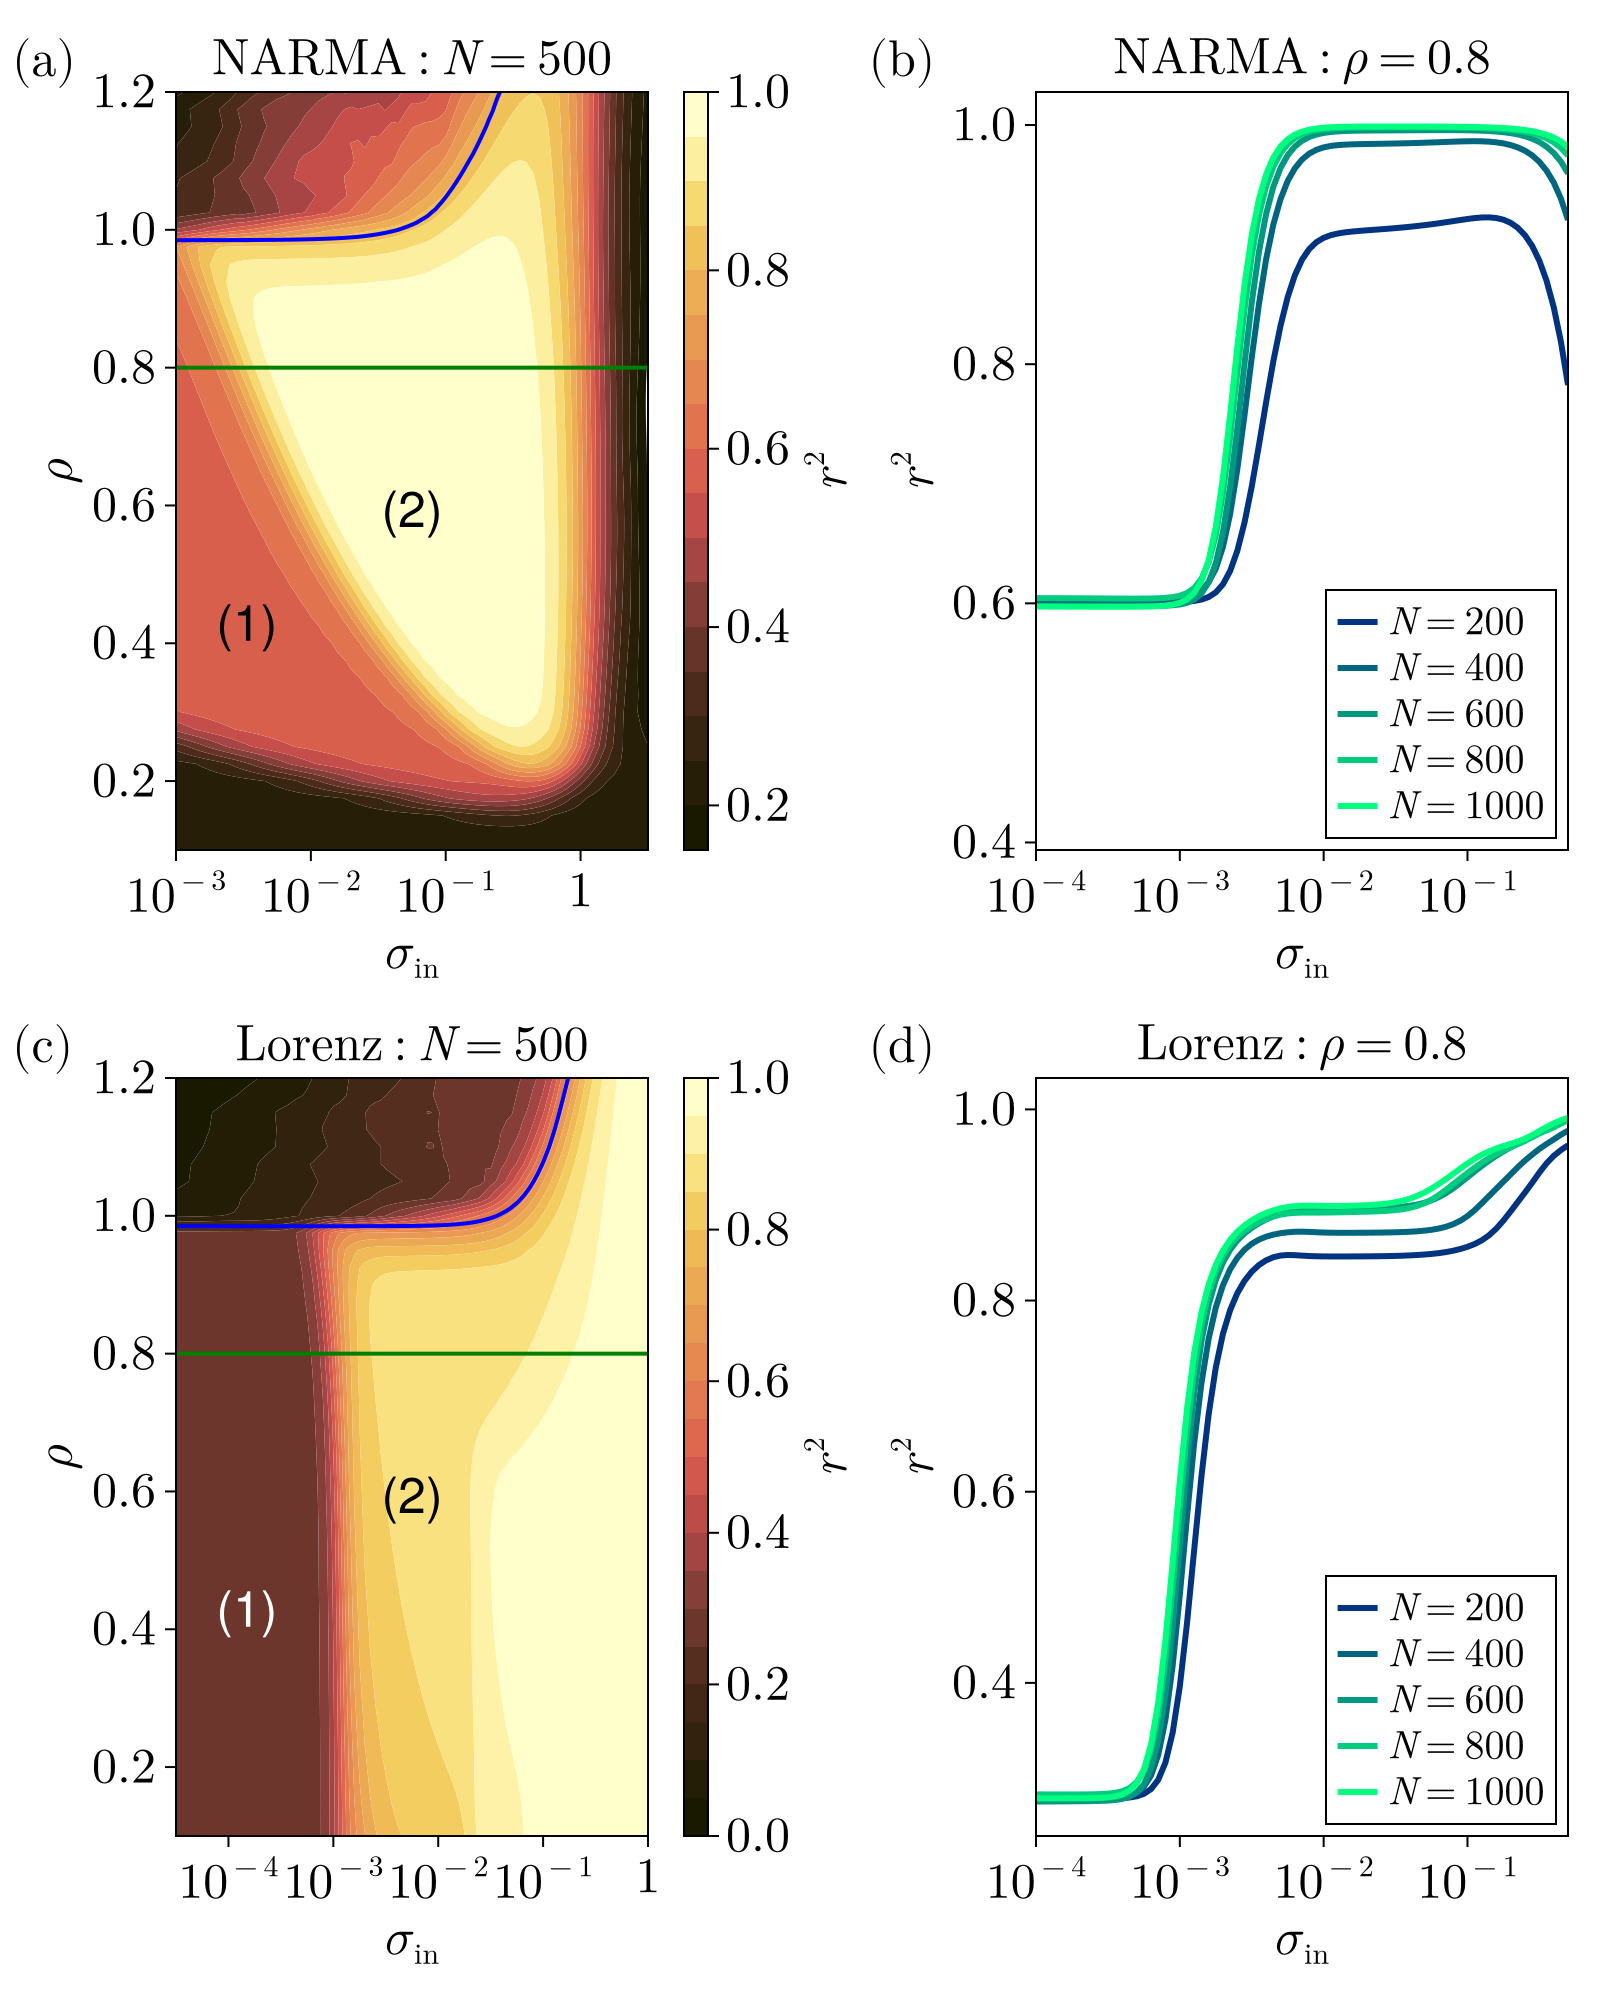

In [8]:
# --- Lorenz: r2 for rho=0.8 ---

input_std_grid = read_from_file("data//lorenz_r2//1_input_std_grid.txt")[:, 1]

avg_r2_200 = load_average("data//lorenz_r2//r2_N=200", 50)[:, 1]
avg_r2_400 = load_average("data//lorenz_r2//r2_N=400", 50)[:, 1]
avg_r2_600 = load_average("data//lorenz_r2//r2_N=600", 20)[:, 1]
avg_r2_800 = load_average("data//lorenz_r2//r2_N=800", 20)[:, 1]
avg_r2_1000 = load_average("data//lorenz_r2//r2_N=1000", 20)[:, 1]

ax = Axis(fig[2, 2];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-4, 1e-3, 1e-2, 1e-1, 1], [L"10^{-4}", L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"\mathrm{Lorenz:} \rho = 0.8")

xlims!(ax, 1e-4, 0.5)

lines!(ax, input_std_grid, avg_r2_200, linewidth=3, color=RGBf(0, 0.2, 0.5), label=L"N = 200")
lines!(ax, input_std_grid, avg_r2_400, linewidth=3, color=RGBf(0, 0.4, 0.5), label=L"N = 400")
lines!(ax, input_std_grid, avg_r2_600, linewidth=3, color=RGBf(0, 0.6, 0.5), label=L"N = 600")
lines!(ax, input_std_grid, avg_r2_800, linewidth=3, color=RGBf(0, 0.8, 0.5), label=L"N = 800")
lines!(ax, input_std_grid, avg_r2_1000, linewidth=3, color=RGBf(0, 1, 0.5), label=L"N = 1000")

axislegend(ax; position=:rb)

Label(fig[2, 2, TopLeft()], L"\mathrm{(d)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

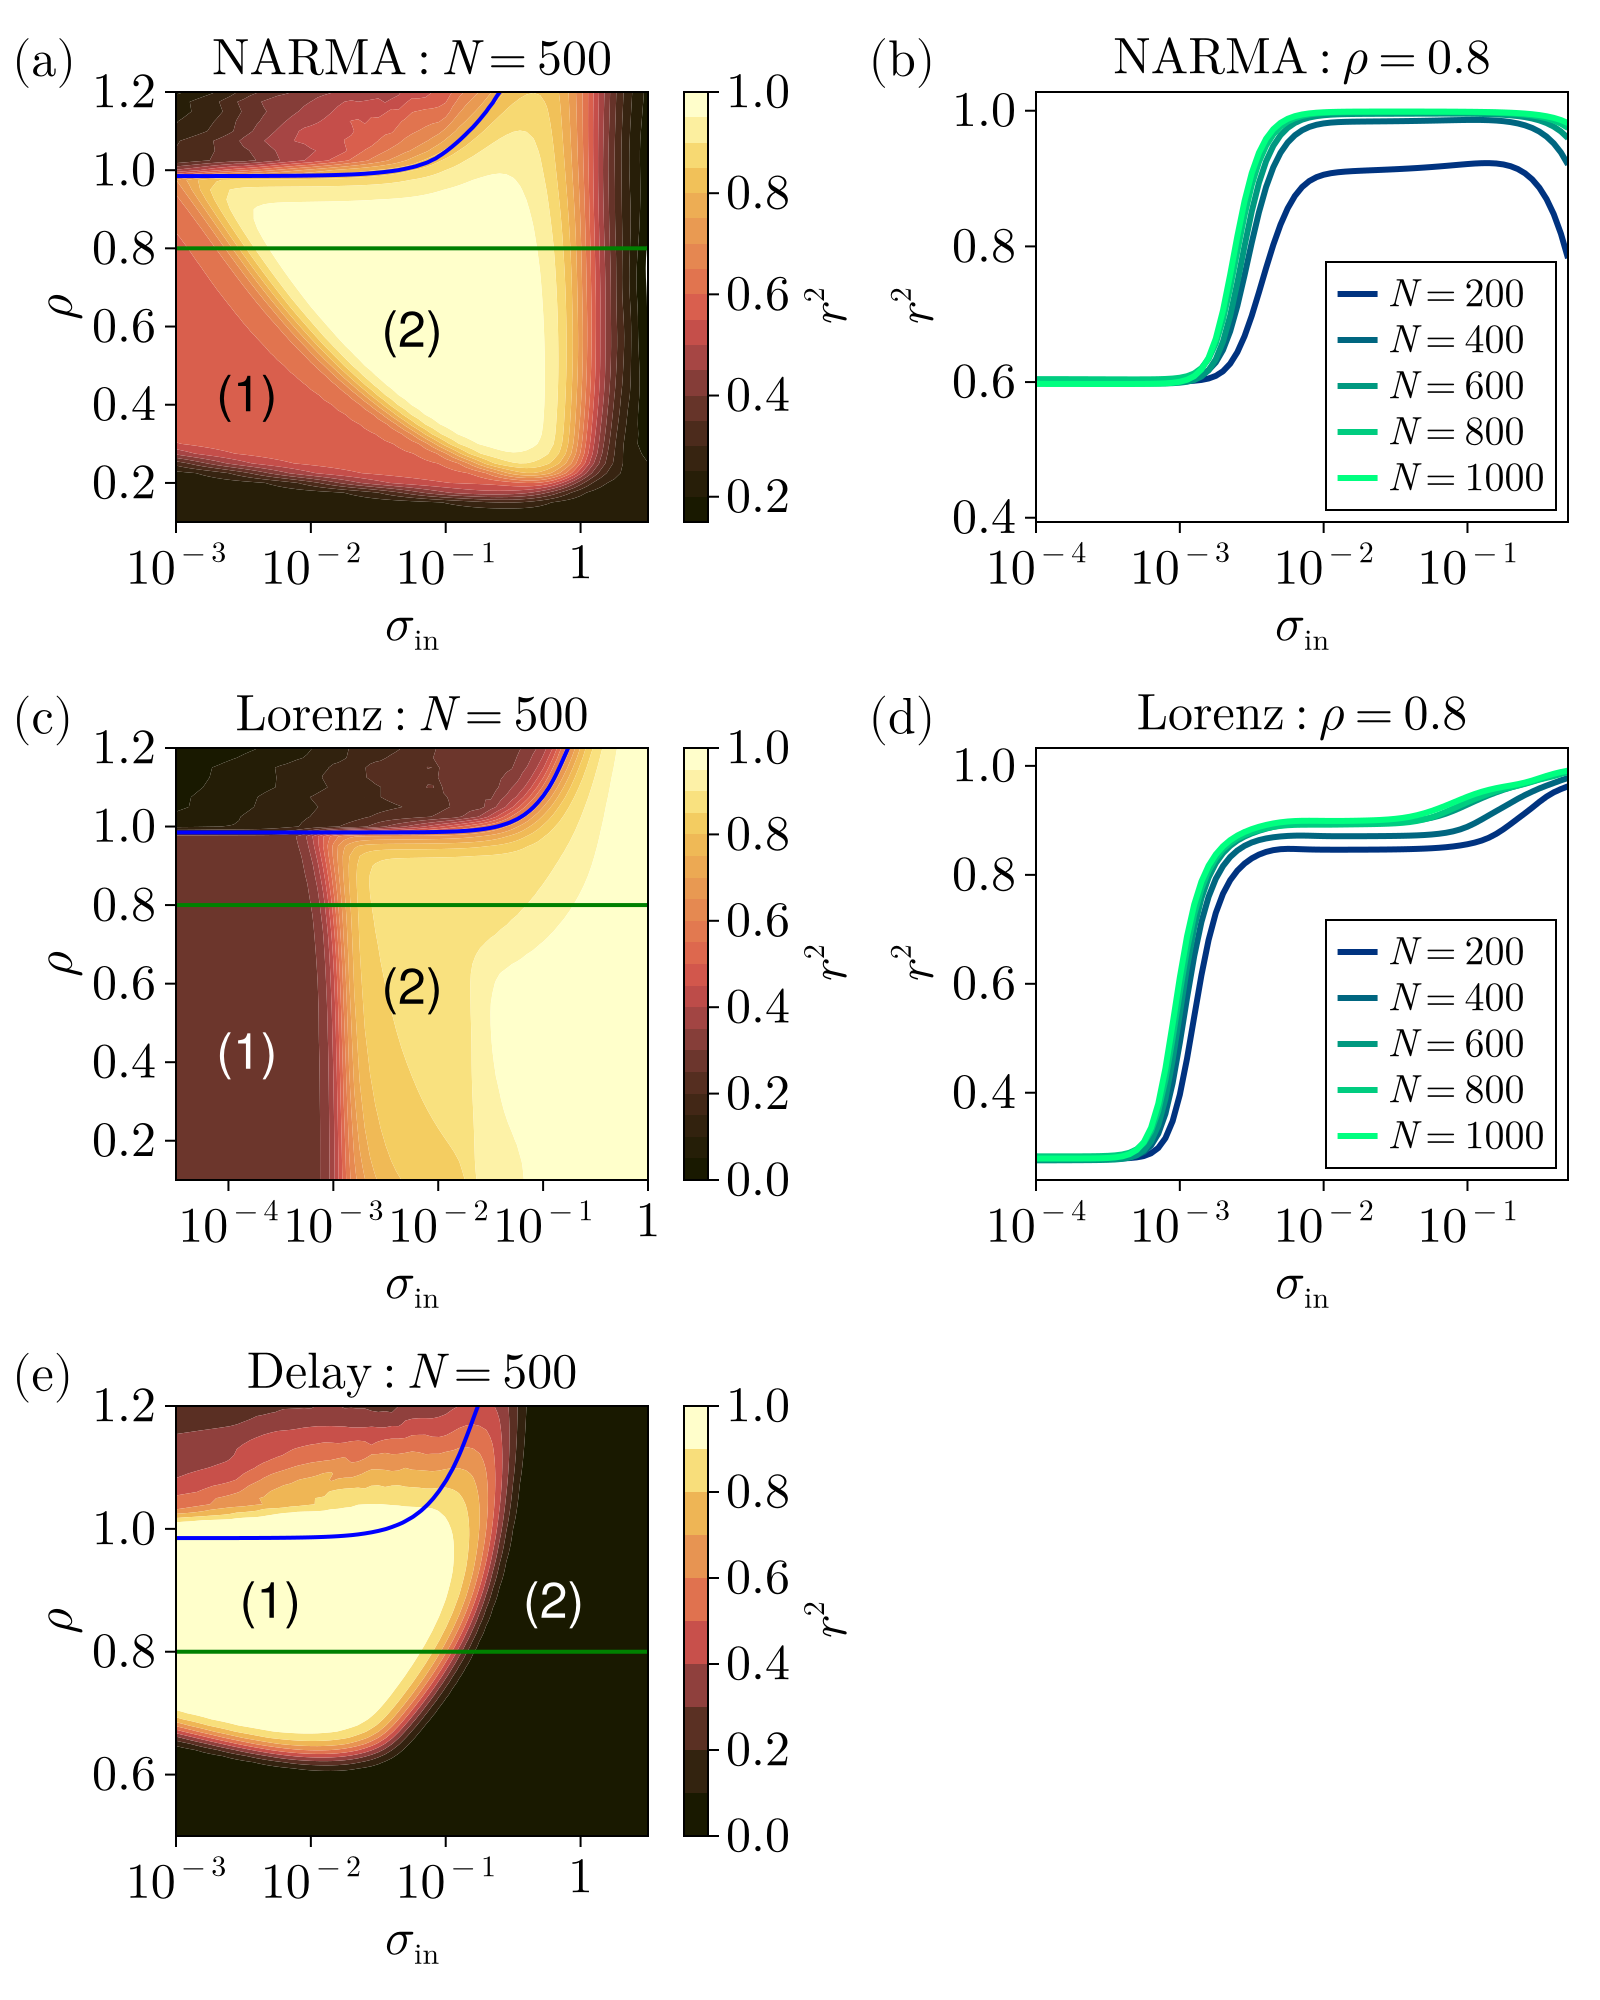

In [9]:
# --- delay N=500: heatmap ---

filename = "data//delay_r2_map//r2_map_N=500"
avg_r2 = load_average(filename, 20)

input_std_grid = 10.0 .^ (-3:0.05:0.5)
spectral_radius_grid = 0.5:0.01:1.2

ax = Axis(fig[3, 1][1, 1];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"\rho",
    xscale=log10,
    xticks=([1e-3, 1e-2, 1e-1, 1], [L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1"]),
    yticks=(0.2:0.2:1.2, [L"0.2", L"0.4", L"0.6", L"0.8", L"1.0", L"1.2"]),
    title=L"\mathrm{Delay:} N = 500")

xlims!(ax, minimum(input_std_grid), maximum(input_std_grid))
ylims!(ax, minimum(spectral_radius_grid), maximum(spectral_radius_grid))

hm = contourf!(ax, input_std_grid, spectral_radius_grid, avg_r2';
    colormap=:lajolla, levels = 0.0:0.1:1)

contour!(ax, input_std_grid_lyap, spectral_radius_grid_lyap, avg_lyap' .+ 1.0, 
    levels=[0.97], color=:blue, linewidth=2)

hlines!(ax, 0.8; color=:green, linewidth=2)

Colorbar(fig[3, 1][1, 2], hm;
    ticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    label=L"r^2")

text!(ax, 0.2, 0.55,
    text      = "(1)",
    space     = :relative,
    align     = (:center, :center),
    fontsize  = 25,
    color     = :black)

text!(ax, 0.8, 0.55,
    text      = "(2)",
    space     = :relative,
    align     = (:center, :center),
    fontsize  = 25,
    color     = :white)

Label(fig[3, 1, TopLeft()], L"\mathrm{(e)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

fig

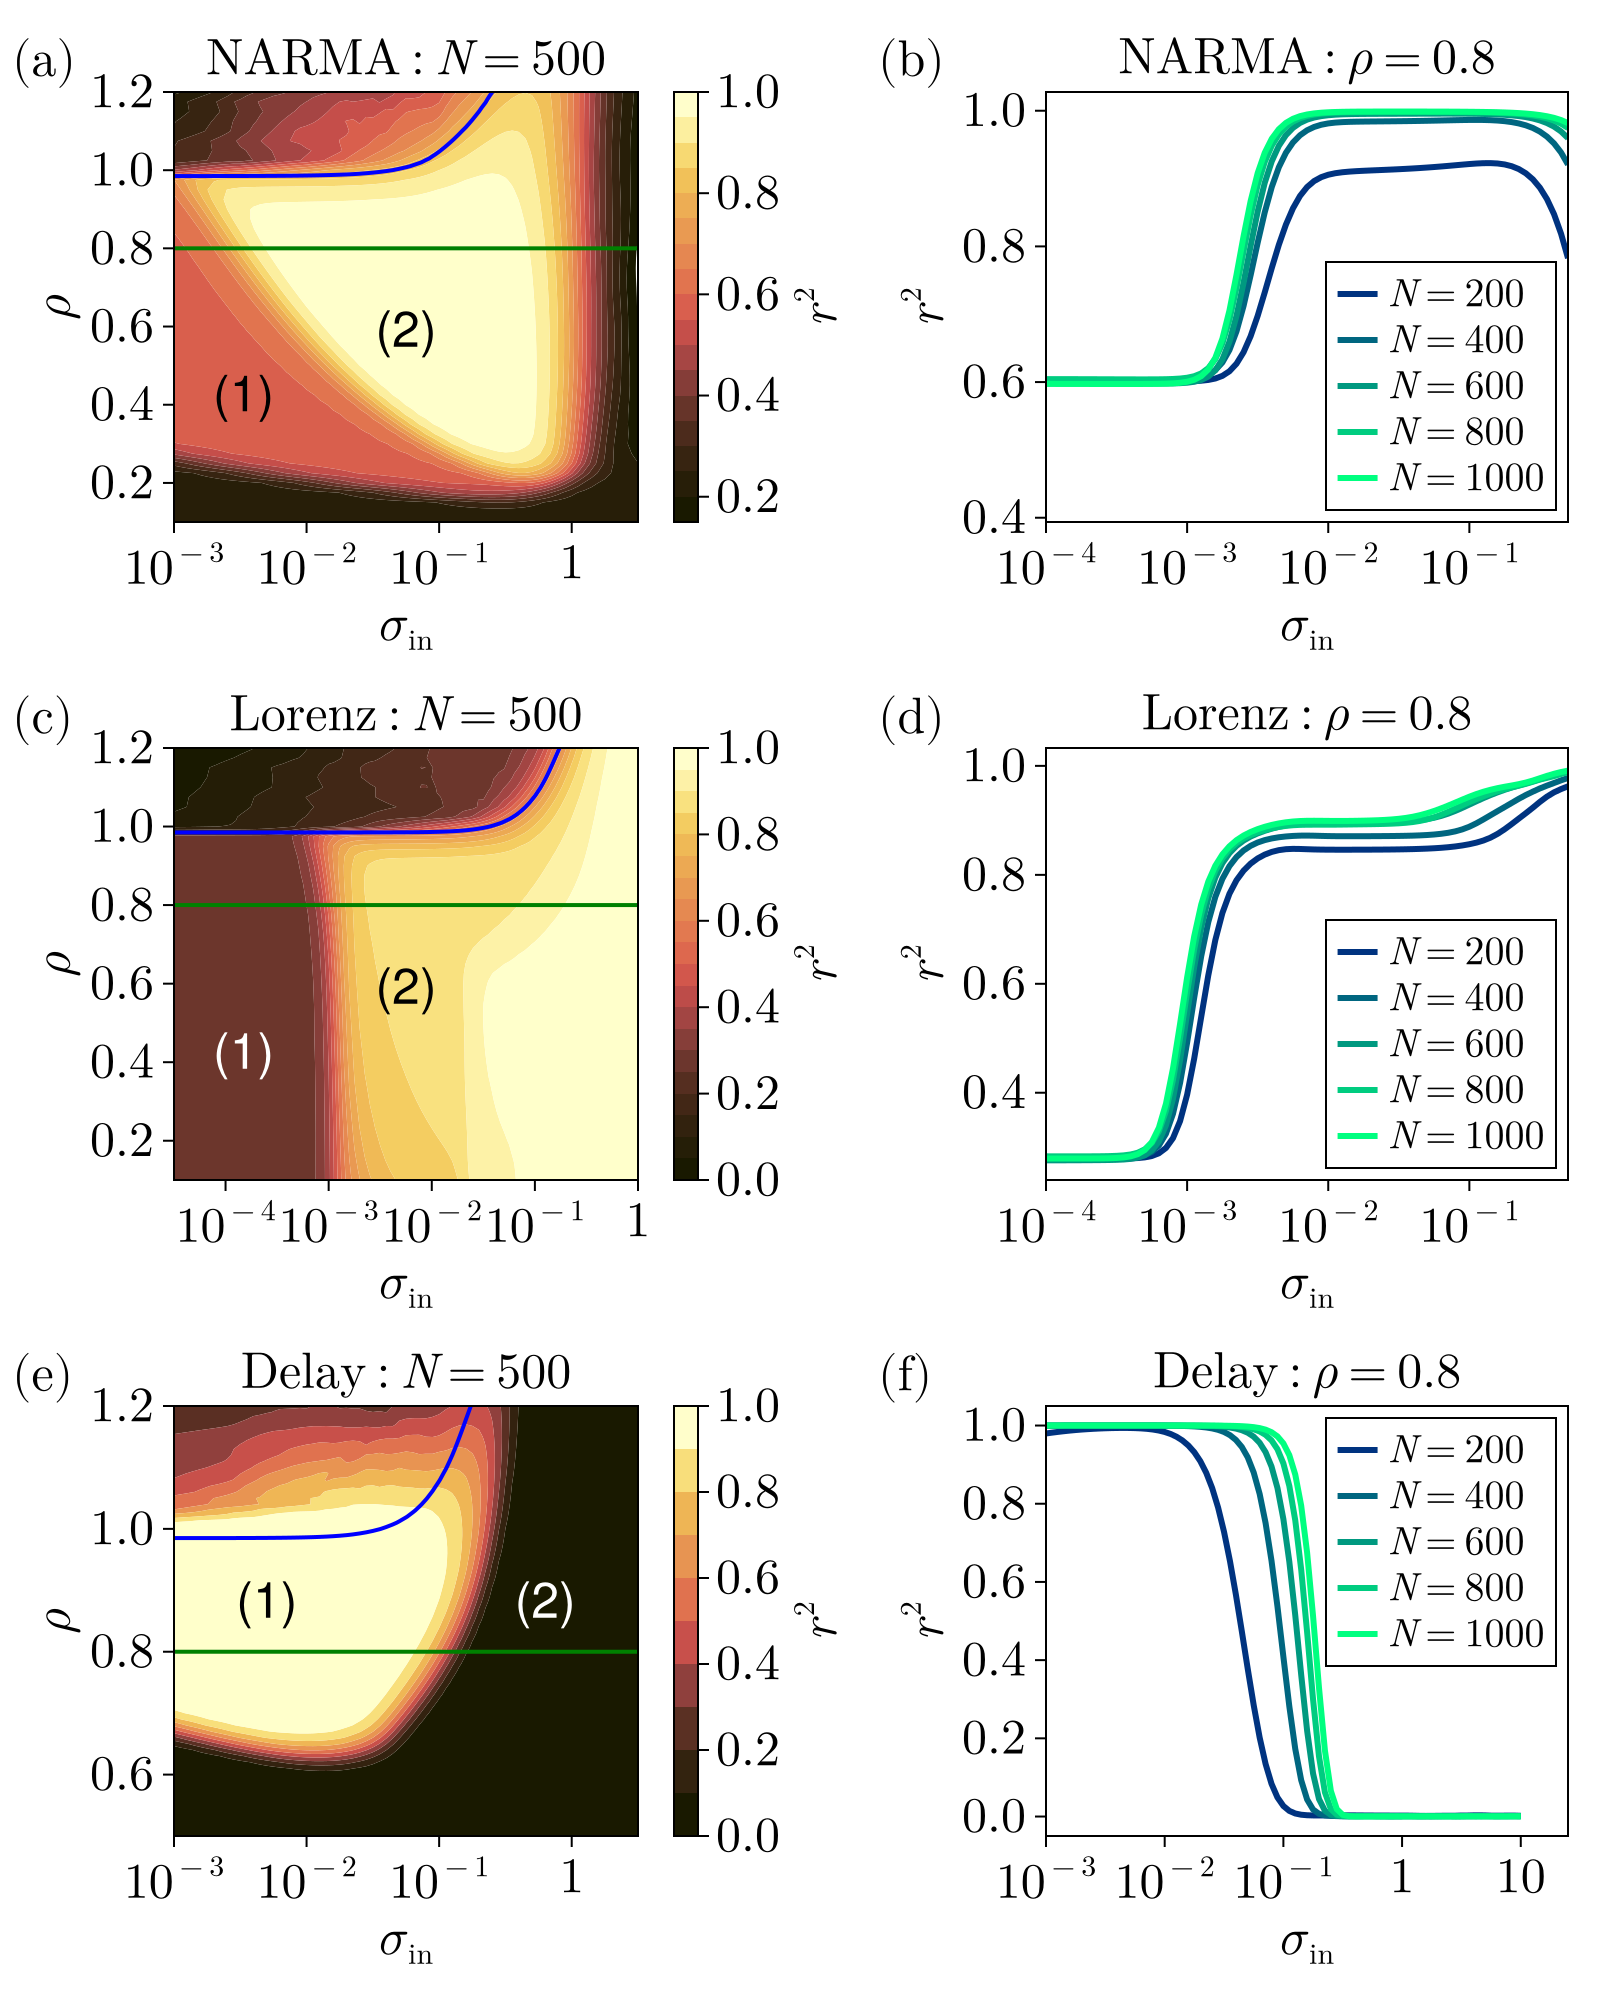

In [10]:
# --- Delay: r2 for rho=0.8 ---

input_std_grid = read_from_file("data//delay_r2//1_input_std_grid.txt")[:, 1]

avg_r2_200 = load_average("data//delay_r2//r2_N=200", 50)[:, 1]
avg_r2_400 = load_average("data//delay_r2//r2_N=400", 50)[:, 1]
avg_r2_600 = load_average("data//delay_r2//r2_N=600", 20)[:, 1]
avg_r2_800 = load_average("data//delay_r2//r2_N=800", 20)[:, 1]
avg_r2_1000 = load_average("data//delay_r2//r2_N=1000", 20)[:, 1]

ax = Axis(fig[3, 2];
    xlabel=L"\sigma_{\mathrm{in}}",
    ylabel=L"r^2",
    xscale=log10,
    xticks=([1e-3, 1e-2, 1e-1, 1, 10], [L"10^{-3}", L"10^{-2}", L"10^{-1}", L"1", L"10"]),
    yticks=(0.0:0.2:1.0, [L"0.0", L"0.2", L"0.4", L"0.6", L"0.8", L"1.0"]),
    title=L"\mathrm{Delay:} \rho = 0.8")

xlims!(ax, 1e-3, 25)

lines!(ax, input_std_grid, avg_r2_200, linewidth=3, color=RGBf(0, 0.2, 0.5), label=L"N = 200")
lines!(ax, input_std_grid, avg_r2_400, linewidth=3, color=RGBf(0, 0.4, 0.5), label=L"N = 400")
lines!(ax, input_std_grid, avg_r2_600, linewidth=3, color=RGBf(0, 0.6, 0.5), label=L"N = 600")
lines!(ax, input_std_grid, avg_r2_800, linewidth=3, color=RGBf(0, 0.8, 0.5), label=L"N = 800")
lines!(ax, input_std_grid, avg_r2_1000, linewidth=3, color=RGBf(0, 1, 0.5), label=L"N = 1000")

axislegend(ax; position=:rt)

Label(fig[3, 2, TopLeft()], L"\mathrm{(f)}";
    fontsize=25,
    halign=:left,
    padding  = (-10, 0, 0, 0))

colgap!(fig.layout, 1, Relative(0.05))

fig

In [11]:
save("fig5_narma_delay.pdf", fig)

CairoMakie.Screen{PDF}
